## Observations and Insights 

In [29]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata_df = pd.read_csv(mouse_metadata_path)
study_results_df = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combine_df = pd.merge(mouse_metadata_df, study_results_df, on="Mouse ID")

# Display the data table for preview




combine_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [30]:
# Check the number of mice.
mouse_count = len(combine_df["Mouse ID"].unique())
print(mouse_count)


249


In [31]:
# Find any duplicate rows with the same Mouse ID's and Timepoints. 

#mc_groupby = combine_df.groupby(["Mouse ID","Timepoint"])
#mc_groupby = combine_df.groupby(["Mouse ID"])
#drop_df = combine_df.drop_duplicates(subset = ["Timepoint"])
#tp_list = mc_groupby["Timepoint"].value_counts

drop_df = combine_df.drop_duplicates(["Mouse ID","Timepoint"])

#print(drop_df)


#mouse2_count = len(drop_df["Mouse ID"].unique())
#print(mouse2_count)

#drop_item_df = purchase_data.drop_duplicates(subset = ["Item ID"])


#most popular items grouped by Item ID & Item Name
#mpi_groupby = purchase_data.groupby(['Item ID', "Item Name"])

#calculate sum & count of total purhases
#purchtotal = mpi_groupby["Price"].sum()

#purchcount = mpi_groupby["Purchase ID"].count()
drop_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [5]:
# Drop any duplicate rows


In [32]:
# Recheck the number of mice
mouse2_count = len(drop_df["Mouse ID"].unique())
print(mouse2_count)

#dl = (drop_df["Drug Regimen"]).unique()
#dl = (drop_df["Drug Regimen"]).value_counts()
dl = (drop_df["Drug Regimen"]).value_counts()
#df2 = df.groupby(['timeIndex'])['isZero'].sum().to_frame('isZero').reset_index()
dl_df = pd.DataFrame(dl)
dl_df = dl_df.reset_index()
len(drop_df)
range(len(drop_df))
len(drop_df)
dl

#dl_df = dl_df.value_counts().rename_axis('drug regimen').reset_index(name='counts')
dl_df



249


,index,Drug Regimen
0,Capomulin,230
1,Ramicane,228
2,Ketapril,188
3,Naftisol,186
4,Zoniferol,182
5,Placebo,181
6,Stelasyn,181
7,Infubinol,178
8,Ceftamin,178
9,Propriva,156


## Summary Statistics

In [89]:
# Generate a summary statistics table of mean, median, variance, 
# standard deviation, and SEM of the tumor volume for each regimen.

#test = drop_df.groupby("Drug Regimen")["Tumor Volume (mm3)""].agg({'Tumor':['min', 'max','median']})

            

#test3 = drop_df.groupby("Drug Regimen")



test = drop_df.groupby("Drug Regimen")["Tumor Volume (mm3)"]


test2 = test.agg({'min', 'max', 'median', 'var', 'std', 'sem'})


#titanic[["Sex", "Age"]].groupby("Sex").mean()
#print(test.groups)


#test3.head()
#test3.size()
#len(drop_df)
test2
                                   

,median,var,min,std,sem,max
Drug Regimen,,,,,,
Capomulin,41.557809,24.947764,23.343598,4.994774,0.329346,48.158209
Ceftamin,51.776157,39.290177,45.000000,6.268188,0.469821,68.923185
Infubinol,51.820584,43.128684,36.321346,6.567243,0.492236,72.226731
Ketapril,53.698743,68.553577,45.000000,8.279709,0.603860,78.567014
Naftisol,52.509285,66.173479,45.000000,8.134708,0.596466,76.668817
Placebo,52.288934,61.168083,45.000000,7.821003,0.581331,73.212939
Propriva,50.909965,43.138803,45.000000,6.568014,0.525862,72.455421
Ramicane,40.673236,23.486704,22.050126,4.846308,0.320955,47.622816
Stelasyn,52.431737,59.450562,45.000000,7.710419,0.573111,75.123690


## Bar and Pie Charts

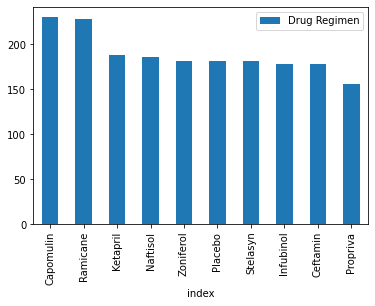

In [34]:
# Generate a bar plot showing the total number of datapoints for each drug regimen using pandas.
# There should be a single bar per regimen

#all = test.shape[0]
#print(all)
#for x in 

dl_df.head()
dl_df = dl_df.rename(columns={})

dl = (drop_df["Drug Regimen"]).value_counts()
#df2 = df.groupby(['timeIndex'])['isZero'].sum().to_frame('isZero').reset_index()
dl_df = pd.DataFrame(dl)
dl_df = dl_df.reset_index()




#drop_df.plot(x="Drug Regimen", y ="Timepoint", kind ="bar" )
dl_df.plot(x="index", y ="Drug Regimen", kind ="bar" )


#plt.show()

#test3 = drop_df.groupby("Drug Regimen")["Timepoint"]

#test3.head()

#test3.plot("Drug Regimen","Timepoint", kind = 'bar')
#test.head(30)

,Sex,Mouse ID
0,Female,930
1,Male,958


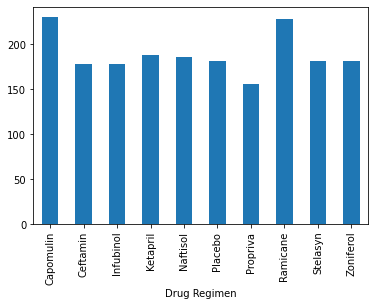

In [35]:
# General identical bar plot using pyplot instead of pandas.

drop_df.groupby("Drug Regimen")["Timepoint"].count().plot(kind='bar')
drop_df.head()
sx_df


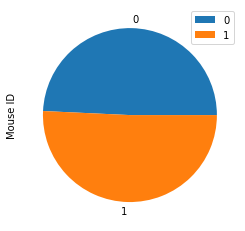

In [36]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

sx = drop_df.groupby("Sex")["Mouse ID"].count()

sx_df = pd.DataFrame(sx)
sx_df = sx_df.reset_index()

#dl_df = dl_df.value_counts().rename_axis('drug regimen').reset_index(name='counts')
#dl_df

sx_df

sx_df.plot(y="Mouse ID", kind="pie")

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


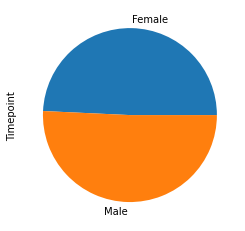

In [48]:
# Generate identical pie plot using pyplot

drop_df.groupby("Sex")["Timepoint"].count().plot(kind='pie')
drop_df.head()
sx_df
drop_df.head()


## Quartiles, Outliers and Boxplots

In [129]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

#dl2 = (drop_df["Drug Regimen"]).value_counts()

caps = drop_df
#print(cap)



#caps = drop_df.groupby[("Drug Regimen"),("Mouse ID")].groups

#cap_df = pd.DataFrame(cap)
#cap_df = cap_df.reset_index()

#capl = drop_df.groupby("Drug Regimen")["TumorDrug Regimen"].count()

#dl_df = pd.DataFrame(dl)
#dl_df = dl_df.reset_index()
#len(drop_df)
#range(len(drop_df))
#len(drop_df)
#dl



# HINT: Not all mice lived until timepoint 45
# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
#print(capl)
#dl2

caps = caps.groupby(["Drug Regimen","Mouse ID"]).groups


caps


{('Capomulin',
  'b128'): Int64Index([300, 301, 302, 303, 304, 305, 306, 307, 308, 309], dtype='int64'),
 ('Capomulin',
  'b742'): Int64Index([290, 291, 292, 293, 294, 295, 296, 297, 298, 299], dtype='int64'),
 ('Capomulin', 'f966'): Int64Index([60, 61, 62, 63, 64], dtype='int64'),
 ('Capomulin',
  'g288'): Int64Index([235, 236, 237, 238, 239, 240, 241, 242, 243, 244], dtype='int64'),
 ('Capomulin',
  'g316'): Int64Index([351, 352, 353, 354, 355, 356, 357, 358, 359, 360], dtype='int64'),
 ('Capomulin',
  'i557'): Int64Index([431, 432, 433, 434, 435, 436, 437, 438, 439, 440], dtype='int64'),
 ('Capomulin',
  'i738'): Int64Index([195, 196, 197, 198, 199, 200, 201, 202, 203, 204], dtype='int64'),
 ('Capomulin',
  'j119'): Int64Index([328, 329, 330, 331, 332, 333, 334, 335, 336, 337], dtype='int64'),
 ('Capomulin',
  'j246'): Int64Index([310, 311, 312, 313, 314, 315, 316, 317], dtype='int64'),
 ('Capomulin',
  'l509'): Int64Index([371, 372, 373, 374, 375, 376, 377, 378, 379, 380], dtype='i

# Calculate the quartiles and IQR and quantitatively determine if there are any potential outliers across all four treatment regimens.

In [62]:
# Calculate quartiles, IQR, and identify potential outliers for each regimen.

# One method to do this is the following, but you can use whatever method works for you.

##############################################################################
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
# There should be a single chart with four box plots inside it.


## Line and Scatter Plots

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse 
# treated with Capomulin


In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight 
# for all mice in the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen


# Observations and Insights